# *<span style="color:blue">Data Visualization</span>*

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from geopy.geocoders import Nominatim
import plotly.express as px

In [3]:
data = pd.read_csv("data_final.csv")

In [ ]:
data

### *<span style="color:green">Job Count Distribution by Experience Level</span>*

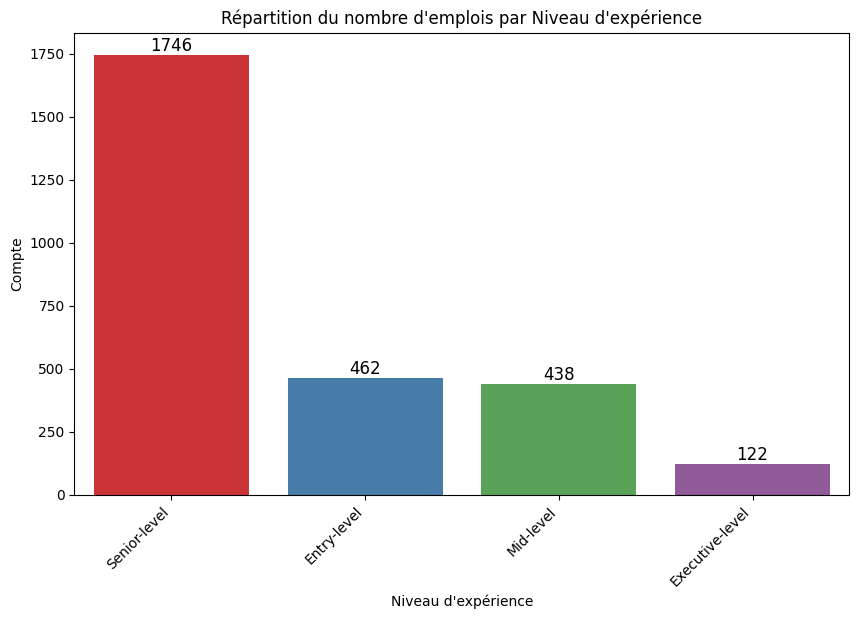

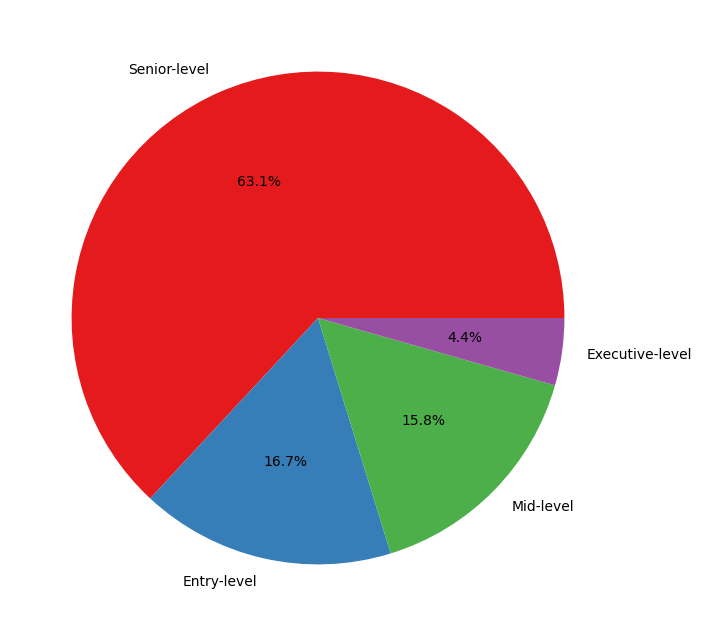

In [29]:
# Exclude rows with 'Not specified' in the 'Experience level' column
data = data[data['Experience level'] != 'Not specified']

# Calculate the count of each category in the 'Experience level' column
experience_counts = data['Experience level'].value_counts()

# Order the categories based on the count values
order = experience_counts.index

# Create the countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='Experience level', data=data, palette='Set1', order=order)

# Add enumerate values to the countplot
for index, value in enumerate(experience_counts):
    plt.text(index, value + 1, str(value), ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.xlabel('Niveau d\'expérience')
plt.ylabel('Compte')
plt.title('Répartition du nombre d\'emplois par Niveau d\'expérience')

# Create a pie chart for the same data
plt.figure(figsize=(8, 8))
plt.pie(experience_counts, labels=experience_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set1'))

plt.show()


### *<span style="color:green">Job Count by Top 10 Salary Groups</span>*

In [31]:
# Filter out rows with 0 value in 'Salary (USD)' column
data_filtered = data[data['Salary (USD)'] != 0]

# Get the top 10 salary groups
top_10_salary_groups = data_filtered['Salary (USD)'].value_counts().nlargest(10)
top_10_salary_groups

Salary (USD)
115000.0    246
62000.0     200
129000.0    168
92000.0     165
55000.0     146
69000.0     121
73000.0     111
131000.0     82
48000.0      75
39000.0      75
Name: count, dtype: int64

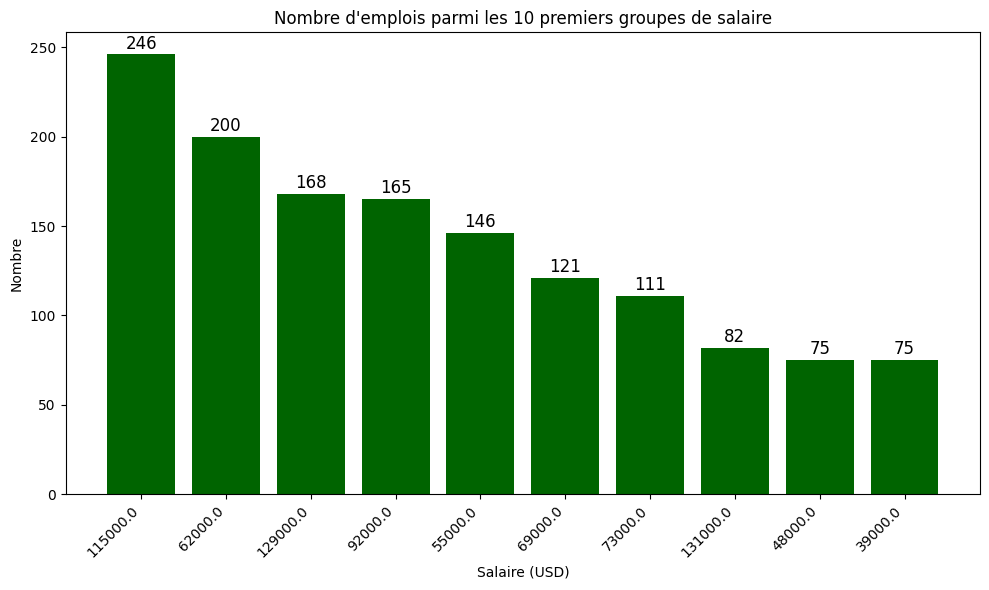

In [32]:
# Exclude the row where salary group is 'Not specified'
top_10_salary_groups = top_10_salary_groups[top_10_salary_groups.index != 'Not specified']

# Convert salary values to strings for proper axis labels
salary_labels = [str(salary) for salary in top_10_salary_groups.index]

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(salary_labels, top_10_salary_groups.values, color='darkgreen')

# Add enumerated values on top of the bars
for index, count in enumerate(top_10_salary_groups.values):
    plt.text(index, count + 1, str(count), ha='center', va='bottom', fontsize=12)

# Customize plot
plt.xticks(rotation=45, ha='right')
plt.xlabel('Salaire (USD)')
plt.ylabel('Nombre')
plt.title('Nombre d\'emplois parmi les 10 premiers groupes de salaire')

# Show the plot
plt.tight_layout()
plt.show()


### *<span style="color:green">Salary distribution</span>*

In [ ]:
data_filtered = data[data['Salary (USD)'] != 0]

# Get the top ten salary groups
top_10_salary_groups = data_filtered['Salary (USD)'].value_counts().nlargest(50)

# Create a DataFrame to store the top ten salary groups and their counts
top_10_df = pd.DataFrame({'Salary (USD)': top_10_salary_groups.index, 'Count': top_10_salary_groups.values})

# Display the top ten salary groups as text output
print(top_10_df)

In [34]:

# Add annotations for the mean and median
mean_salary = data_filtered['Salary (USD)'].mean()
median_salary = data_filtered['Salary (USD)'].median()




In [9]:
mean_salary


91122.3423076923

In [10]:
median_salary

77000.0

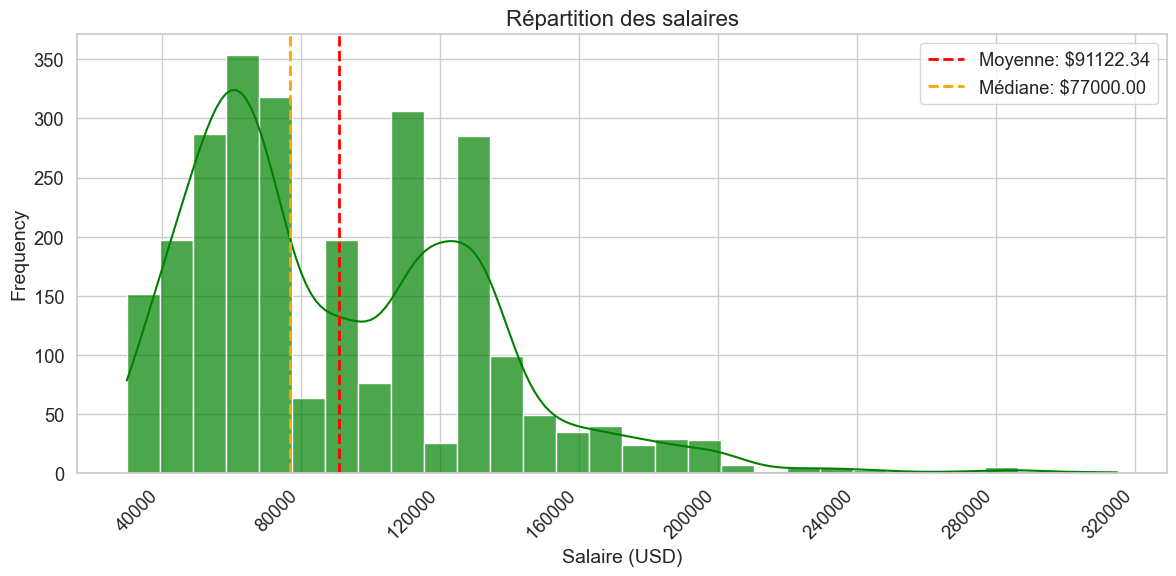

In [36]:
# Filter out rows with 0 value in 'Salary (USD)' column
data_filtered = data[data['Salary (USD)'] != 0]

# Set the plot style and font size
sns.set(style="whitegrid", font_scale=1.2)

# Create the histogram plot
plt.figure(figsize=(12, 6))
sns.histplot(data_filtered['Salary (USD)'], kde=True, color='green', bins=30, alpha=0.7)

# Add title and labels
plt.title('Répartition des salaires', fontsize=16)
plt.xlabel('Salaire (USD)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)



plt.axvline(mean_salary, color='red', linestyle='dashed', linewidth=2, label=f'Moyenne: ${mean_salary:.2f}')
plt.axvline(median_salary, color='orange', linestyle='dashed', linewidth=2, label=f'Médiane: ${median_salary:.2f}')

# Add legend
plt.legend()

# Adjust x-axis ticks
plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))

# Show the plot
plt.tight_layout()
plt.show()


### *<span style="color:green">Top 10 Comapny requirements</span>*

In [38]:
# Concatenate all the keywords from the entire column into a single string
all_keywords_string = ' '.join(data['Company_requirement'])

# Split the concatenated string into a list of individual keywords, excluding empty strings
all_keywords_list = [keyword.strip() for keyword in all_keywords_string.replace('"', '').split(',') if keyword.strip()]

# Convert the list to a set to remove duplicates, then back to a list to maintain order
distinct_keywords_list = list(set(all_keywords_list))

# Display the distinct list of keywords
print(distinct_keywords_list)

['Research Computer Science', 'Security Azure', 'Kafka', 'Databricks Business Intelligence', 'Athena', 'FinTech Computer Science', 'Economics Architecture', 'Drug discovery Agile', 'Machine Learning A/B testing', 'Data visualization APIs', 'Excel Biology', 'Pandas AWS', 'Python BigQuery', 'E-commerce Data warehouse', 'Docker APIs', 'ML infrastructure Consulting', 'Azure Airflow', 'ML models CX', 'Testing CX', 'CUDA Business Intelligence', 'Data pipelines Biology', 'Business Intelligence Big Data', 'Mathematics BigQuery', 'Docker Architecture', 'GitLab Big Data', 'NLP APIs', 'MS SQL Banking', 'BigQuery Consulting', 'Snowflake Agile', 'Docker', 'Deep Learning Agile', 'Data pipelines Airflow', 'Clojure', 'Data warehouse Big Data', 'Engineering Amplitude', 'Engineering Clustering', 'Data Warehousing E-commerce', 'Python E-commerce', 'Python Agile', 'Finance Data pipelines', 'Data Analytics fastai', 'Data governance DataOps', 'Machine Learning Data analysis', 'MLFlow Consulting', 'Anaconda'

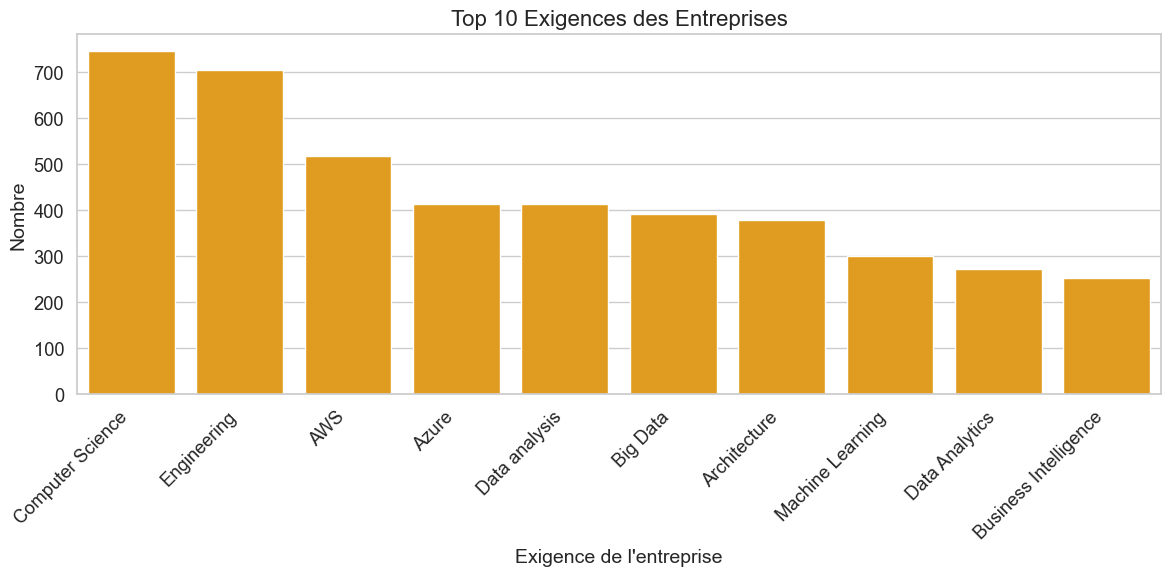

In [40]:
# Count the frequency of each keyword
keyword_counts = {keyword: all_keywords_list.count(keyword) for keyword in distinct_keywords_list}

# Sort the keywords based on their frequency in descending order
sorted_keywords = {k: v for k, v in sorted(keyword_counts.items(), key=lambda item: item[1], reverse=True)}

# Get the top 10 most frequent company requirements
top_company_requirements = list(sorted_keywords.keys())[:10]
top_company_counts = list(sorted_keywords.values())[:10]

# Set the plot style and font size
sns.set(style="whitegrid", font_scale=1.2)

# Create the bar plot for top company requirements
plt.figure(figsize=(12, 6))
sns.barplot(x=top_company_requirements, y=top_company_counts, color='orange')

# Add title and labels
plt.title('Top 10 Exigences des Entreprises', fontsize=16)
plt.xlabel('Exigence de l\'entreprise', fontsize=14)
plt.ylabel('Nombre', fontsize=14)

# Adjust x-axis ticks
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


### *<span style="color:green">Top 10 Companies with Highest Salaries</span>*

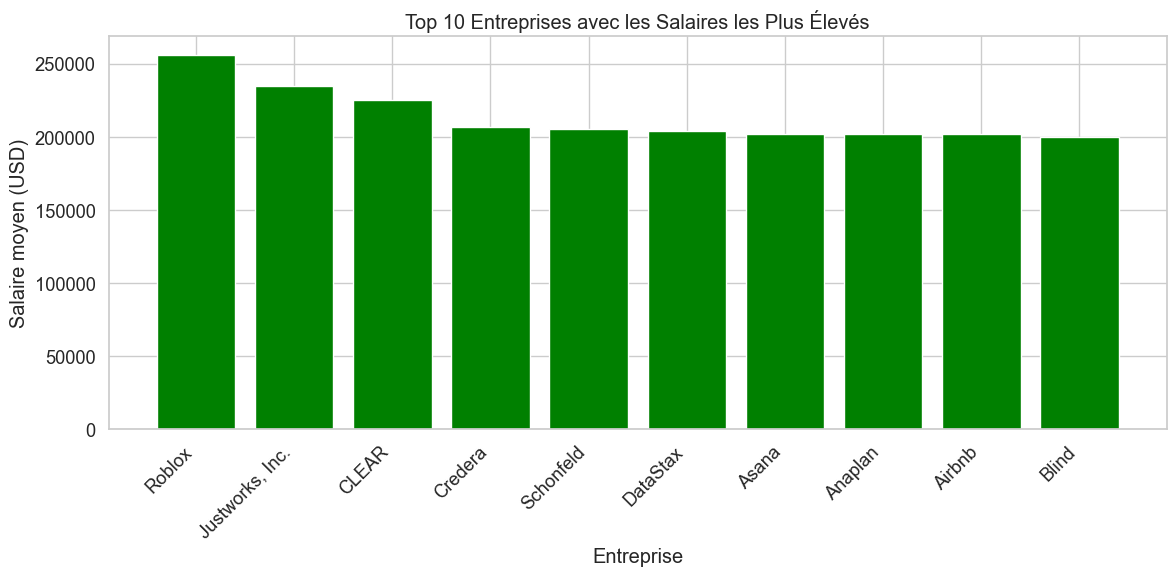

In [53]:
# Filter out rows with 0 value in 'Salary (USD)' column
data_filtered = data[data['Salary (USD)'] != 0]

# Calculate the average salary for each company
company_salary_avg = data_filtered.groupby('Company')['Salary (USD)'].mean().reset_index()

# Sort the companies based on average salary in descending order and select the top 10
top_10_companies = company_salary_avg.sort_values(by='Salary (USD)', ascending=False).head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(top_10_companies['Company'], top_10_companies['Salary (USD)'], color='green')
plt.xlabel('Entreprise')
plt.ylabel('Salaire moyen (USD)')
plt.title('Top 10 Entreprises avec les Salaires les Plus Élevés')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### *<span style="color:green">Top 5 Companies by Requirement</span>*

In [15]:
# Replace empty values or whitespaces with "Not specified" in the 'Company_requirement' column
data_filtered.loc[:, 'Company_requirement'] = data_filtered['Company_requirement'].str.strip().replace('', 'Not specified')

# Perform the value count after filling the empty values
requirements_count = data_filtered['Company_requirement'].str.replace('"', '').str.split(',').explode().value_counts()

# Get the top 6 requirements
top_10_requirements = requirements_count.head(5)
print(top_10_requirements)


Company_requirement
Computer Science    951
Engineering         859
AWS                 739
Architecture        667
Agile               500
Name: count, dtype: int64


C:\Users\Youcode\AppData\Local\Temp\ipykernel_30112\1778658311.py:35: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



<Figure size 1000x1000 with 0 Axes>

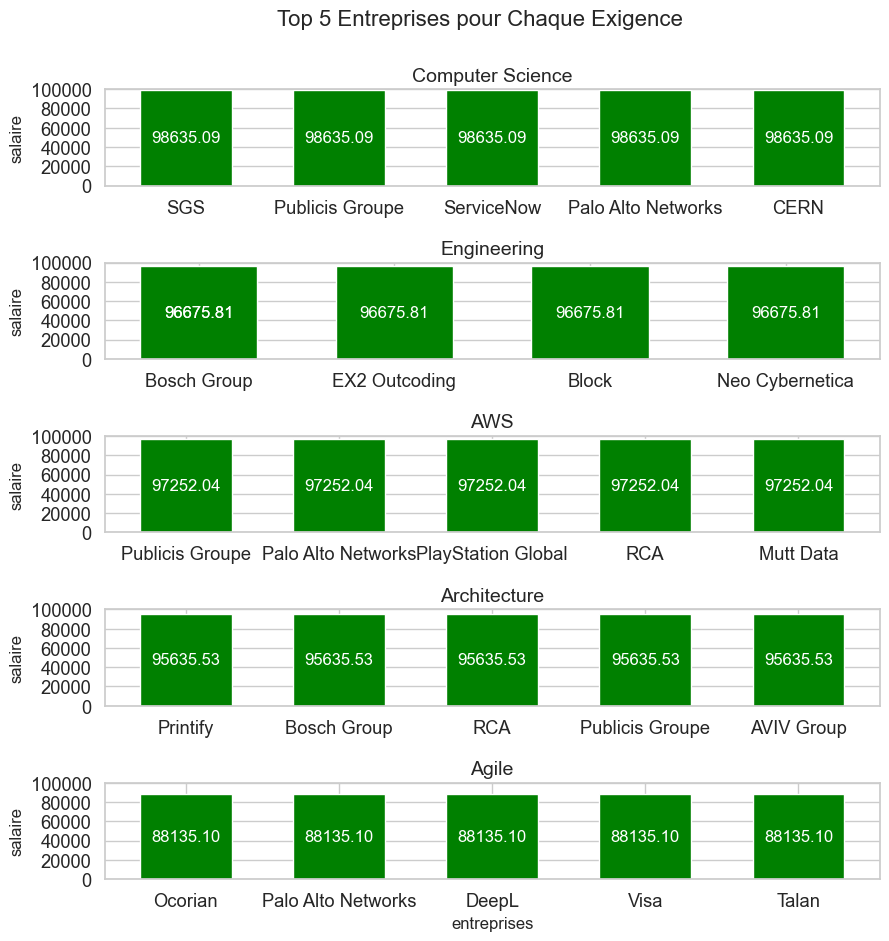

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter out rows with 0 value in 'Salary (USD)' column
data_filtered = data[data['Salary (USD)'] != 0]

# Drop rows with null values in 'Company_requirement' column
data_filtered = data_filtered.dropna(subset=['Company_requirement'])

# Group the data by 'Company_requirement' to count occurrences
requirements_count = data_filtered['Company_requirement'].str.replace('"', '').str.split(',').explode().value_counts()

# Get the top ten requirements excluding "Not specified"
top_10_requirements = requirements_count[requirements_count.index != 'Not specified'].head(5)

# Find the top 3 companies for each of the top ten requirements and their average salaries
top_companies = {}
for requirement in top_10_requirements.index:
    companies = data_filtered[data_filtered['Company_requirement'].str.contains(requirement)]['Company']
    avg_salary = data_filtered[data_filtered['Company_requirement'].str.contains(requirement)]['Salary (USD)'].mean()
    top_companies[requirement] = {'Entreprises': companies.head(5), 'Average Salary': avg_salary}

# Create a vertical bar plot for each requirement showing the top 3 companies and their average salary
plt.figure(figsize=(10, 10))
num_rows = len(top_companies)

# Adjust the top margin to create a gap between the title and the graphs
plt.subplots(num_rows, 1, figsize=(10, 10), gridspec_kw={"top": 0.9, "hspace": 0.8})

for i, (requirement, info) in enumerate(top_companies.items(), 1):
    plt.subplot(num_rows, 1, i)
    bars = plt.bar(info['Entreprises'], info['Average Salary'], color='green', width=0.6)  # Adjust the width here
    plt.ylabel('salaire', fontsize=12)
    plt.gca().invert_yaxis()  # Invert y-axis to display the highest salary at the top
    plt.tight_layout()

    # Add salary values inside the bars with smaller font size and padding
    for bar in bars:
        height = bar.get_height()
        # Adjust the offset in the y-coordinate (use -10000 for a slight padding)
        plt.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{height:.2f}', ha='center', va='center', color='white', fontsize=12)

    # Set y-axis limits and ticks for better visibility of bars
    salary_increment = 20000
    max_salary = info['Average Salary'] * 1
    plt.ylim(0, max_salary)
    plt.yticks(range(0, int(max_salary) + salary_increment, salary_increment))

# Add a general title for all subplots
plt.suptitle('Top 5 Entreprises pour Chaque Exigence', fontsize=16)

# Show the requirement name on top of each graph
for i, requirement in enumerate(top_companies.keys(), 1):
    plt.subplot(num_rows, 1, i)
    plt.title(requirement, fontsize=14)

# Add x-axis label only to the last subplot
plt.subplot(num_rows, 1, num_rows)
plt.xlabel('entreprises', fontsize=12)

plt.show()

### *<span style="color:green">The Most Facilities Offered by Companies</span>*

In [21]:
# Drop rows with null values in 'Facilities' column
data_filtered = data.dropna(subset=['Facilities'])

# Count the frequency of each facility
facility_counts = data_filtered['Facilities'].str.split(',').explode().str.strip().value_counts()

# Get the top 15 facilities and their counts
top_15_facilities = facility_counts.head(15)

# Aggregate the rest of the facilities as 'Others'
rest_count = facility_counts[15:].sum()

# Create a DataFrame for the top 15 facilities
top_facilities = pd.DataFrame({
    'facility': top_15_facilities.index,
    'count': top_15_facilities.values
})

# Add 'Others' to the DataFrame
other_facility = pd.DataFrame({'facility': ['Others'], 'count': [rest_count]})
top_facilities = pd.concat([top_facilities, other_facility], ignore_index=True)

# Calculate the total count for all facilities
total_count = top_facilities['count'].sum()

# Calculate the percentages for each facility
top_facilities['percentage'] = (top_facilities['count'] / total_count) * 100

# Create a Sunburst Chart
fig = go.Figure(go.Sunburst(
    labels=top_facilities['facility'],
    parents=[''] * len(top_facilities['facility']),
    values=top_facilities['count'],
    customdata=top_facilities['percentage'],  # Pass percentages as custom data
    hovertemplate='<b>%{label}</b><br>Count: %{value}<br>Percentage: %{customdata:.2f}%',  # Custom hover template
))

# Set the textinfo attribute to show labels, count values, and percentages
fig.update_traces(textinfo='label+value+percent entry')

fig.update_layout(title='The Most Facilities Offered by Companies', margin=dict(l=0, r=0, t=40, b=0))
fig.show()


### *<span style="color:green">Domain Trends Distribution</span>*

In [29]:
market_trend_counts = data['Domain'].value_counts()
top_7_market_trends = market_trend_counts.nlargest(7)
top_7_market_trends

Domain
Data Analyst               670
Data Science               542
Big Data                   445
Machine Learning           327
Data Engineer              306
Artificial Intelligence    184
Business Intelligence      140
Name: count, dtype: int64

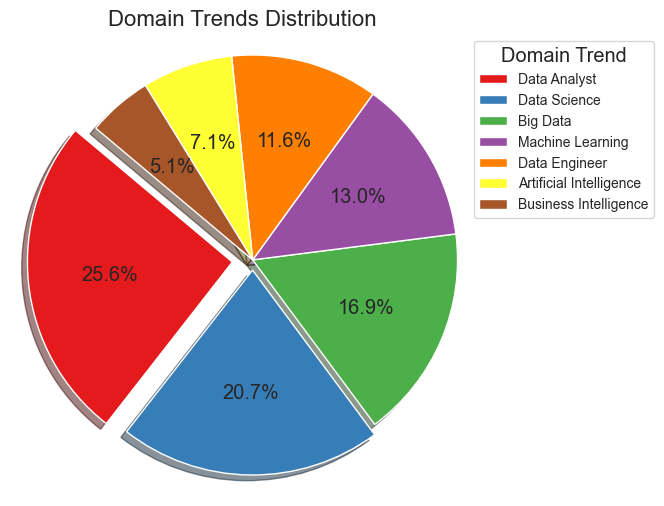

In [18]:
# Count the occurrences of each category in the 'Market trend' column
market_trend_counts = data['Domain'].value_counts()

# Get the top 7 market trends
top_7_market_trends = market_trend_counts.nlargest(7)

# Create a list of custom colors for the pie chart
custom_colors = sns.color_palette('Set1')

# Create an array to explode the first two slices
explode = [0.1, 0.05, 0, 0, 0, 0, 0]

# Create a pie chart
plt.figure(figsize=(6, 6))
patches, texts, autotexts = plt.pie(top_7_market_trends, labels=None, autopct='%1.1f%%', colors=custom_colors, explode=explode, shadow=True, startangle=140)

# Add a legend in the top right corner with some distance from the pie chart
plt.legend(patches, top_7_market_trends.index, title='Domain Trend', loc='upper right', bbox_to_anchor=(1.4, 1), fontsize=10)

# Add a title and adjust font size
plt.title('Domain Trends Distribution', fontsize=16)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

plt.show()


### *<span style="color:green">Job format distribution</span>*

In [30]:
market_trend_counts = data['Job Format'].value_counts()
market_trend_counts

Job Format
In location    2517
Remote          478
Name: count, dtype: int64

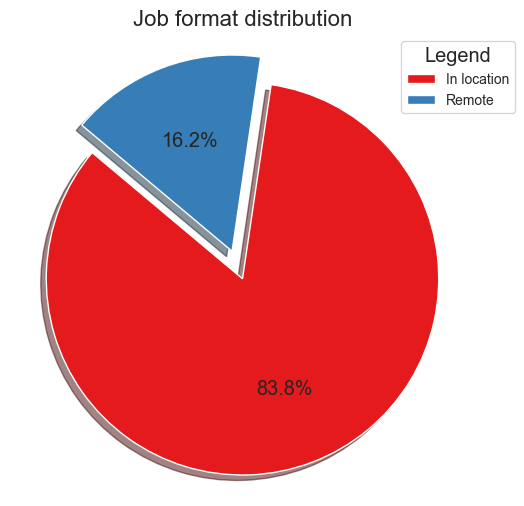

In [19]:
# Count the occurrences of each category in the 'Market trend' column
market_trend_counts = data['Job Format'].value_counts()

# Get the top 7 market trends
top_7_market_trends = market_trend_counts.nlargest(7)

# Create a list of custom colors for the pie chart
custom_colors = sns.color_palette('Set1')

# Create an array to explode the first two slices
explode = [0.1, 0.05]

# Create a pie chart
plt.figure(figsize=(6, 6))
patches, texts, autotexts = plt.pie(top_7_market_trends, labels=None, autopct='%1.1f%%', colors=custom_colors, explode=explode, shadow=True, startangle=140)

# Add a legend in the top right corner with some distance from the pie chart
plt.legend(patches, top_7_market_trends.index, title='Legend', loc='upper right', bbox_to_anchor=(1.1, 1), fontsize=10)

# Add a title and adjust font size
plt.title('Job format distribution', fontsize=16)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

plt.show()


### *<span style="color:green">Job Type Distribution</span>*

In [31]:
job_type_counts = data['Job Type'].value_counts()
job_type_counts

Job Type
Full Time     2917
Internship      72
Part Time        6
Name: count, dtype: int64

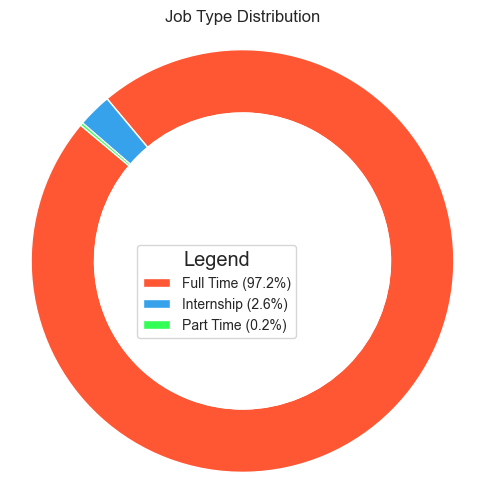

In [20]:
# Count the occurrences of each category in the 'Job Type' column
job_type_counts = data['Job Type'].value_counts()

# Calculate the percentage for each job type
total_jobs = job_type_counts.sum()
job_type_percentages = [(count / total_jobs) * 100 for count in job_type_counts]

# Create a list of custom colors for the pie chart
custom_colors = ['#FF5733', '#36A2EB', '#33FF57', '#FFCC33']

# Create a donut chart
plt.figure(figsize=(6, 6))
wedges, _ = plt.pie(job_type_counts, labels=None, colors=custom_colors, startangle=140, wedgeprops=dict(width=0.3))

# Add a white circle in the center to create the donut effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add a title and adjust font size
plt.title('Job Type Distribution', fontsize=12)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Add percentages to the pie chart and create the legend with custom labels and percentages
legend_labels = ['{} ({:.1f}%)'.format(label, percentage) for label, percentage in zip(job_type_counts.index, job_type_percentages)]
plt.legend(wedges, legend_labels, loc='upper right')
plt.legend(wedges, legend_labels, title='Legend', bbox_to_anchor=(0.63,0.55), fontsize=10)

plt.show()


# country

### *<span style="color:green">Top Count Domain for Each Country (Top 10 Countries)</span>*

In [40]:
# Filter the data to exclude rows with country 'Not exists' or 'Remote Worldwide'
filtered_data = data[(data['country'] != 'Not exists') & (data['country'] != 'Remote Worldwide')]

# Get the top 10 countries with the highest salaries
top_10_countries = filtered_data['country'].value_counts().nlargest(10).index.tolist()

# Filter the data to include only the records for the top 10 countries
data_top_10_countries = filtered_data[filtered_data['country'].isin(top_10_countries)]

# Group the data by country and domain to count occurrences
domain_counts = data_top_10_countries.groupby(['country', 'Domain']).size().reset_index(name='Count')
pd.set_option('display.max_rows', None)

# Sort the domains for each country based on their counts in descending order
domain_counts = domain_counts.sort_values(by=['country', 'Count'], ascending=[True, False])
# Select the top count domain for each country
top_domains = domain_counts.groupby('country').first().reset_index()
print(top_domains)

          country        Domain  Count
0       Australia  Data Analyst     16
1          Brazil      Big Data     13
2          Canada  Data Science     25
3          France      Big Data     37
4         Germany  Data Analyst     28
5           India      Big Data     51
6          Poland  Data Science     11
7           Spain  Data Analyst     14
8  United Kingdom  Data Analyst     65
9   United States  Data Analyst    220


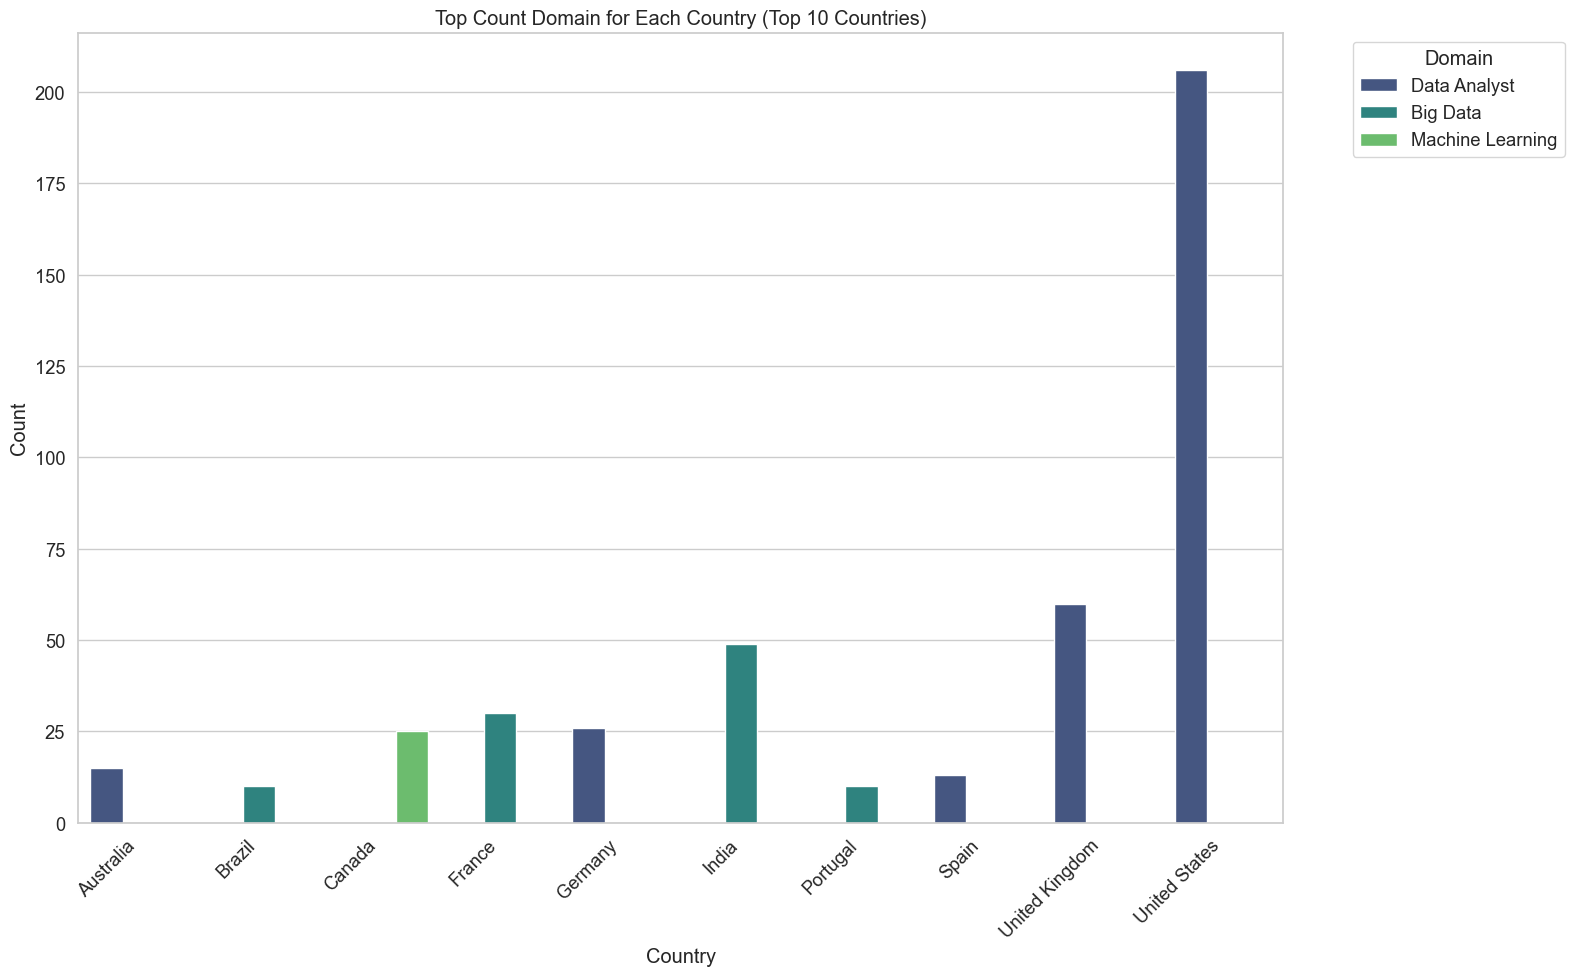

In [21]:
# Create a vertical bar plot to visualize the distribution of top count domains for each country
plt.figure(figsize=(16, 10))
sns.barplot(x='country', y='Count', hue='Domain', data=top_domains, palette='viridis', orient='v')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top Count Domain for Each Country (Top 10 Countries)')
plt.legend(title='Domain', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### *<span style="color:green">Bubble Map of Top 10 Countries with Job Offers</span>*

In [22]:
# Filter out rows where the country is 'Not exists' or 'Remote Worldwide'
data_top_countries = data[(data['country'] != 'Not exists') & (data['country'] != 'Remote Worldwide')]

# Get the top 10 countries with the highest job offers count
top_10_countries = data_top_countries['country'].value_counts().head(10).index.tolist()
top_10_countries

['United States',
 'India',
 'United Kingdom',
 'France',
 'Canada',
 'Germany',
 'Spain',
 'Australia',
 'Brazil',
 'Poland']

In [23]:
# Filter out rows where the country is 'Not exists' or 'Remote Worldwide'
data_top_countries = data[(data['country'] != 'Not exists') & (data['country'] != 'Remote Worldwide')]

# Get the top 10 countries with the highest job offers count
top_10_countries = data_top_countries['country'].value_counts().head(10).index.tolist()

# Group the data by country to count job offers occurrences
country_job_counts = data_top_countries['country'].value_counts().reset_index()
country_job_counts.columns = ['country', 'Job Count']

# Initialize the geolocator
geolocator = Nominatim(user_agent="job-offers-map")

# Get latitude and longitude data for each country
latitude_list = []
longitude_list = []
for country_name in top_10_countries:
    location = geolocator.geocode(country_name)
    if location:
        latitude_list.append(location.latitude)
        longitude_list.append(location.longitude)
    else:
        latitude_list.append(None)
        longitude_list.append(None)

# Create a list to store the scattergeo traces for each country
traces = []

# Create a Scattergeo trace for each country and add it to the list
for i, country in enumerate(top_10_countries):
    country_data = country_job_counts[country_job_counts['country'] == country]
    # Adjust the bubble size by dividing the job count by a larger constant factor (e.g., 50)
    bubble_size = country_data['Job Count'] / 1.5
    trace = go.Scattergeo(
        lon=[longitude_list[i]],
        lat=[latitude_list[i]],
        mode='markers',
        marker=dict(size=bubble_size, sizemode='area', colorscale='Viridis', showscale=False),
        hoverinfo='text',
        text=country_data['country'],
        name=country
    )
    traces.append(trace)

# Create the Bubble Map using Plotly Graph Objects
fig = go.Figure(traces)

# Update the layout to set the title
fig.update_layout(title='Top 10 Countries with Job Offers')

# Show the figure
fig.show()


### *<span style="color:green">Table of Top 10 Countries with Job Offers</span>*

In [24]:
# Filter the country_job_counts DataFrame to include only the top 10 countries
country_job_counts = country_job_counts[country_job_counts['country'].isin(top_10_countries)]

# Create a DataFrame for the table
table_df = pd.DataFrame({'Country': country_job_counts['country'], 'Job Count': country_job_counts['Job Count']})
print(table_df)

          Country  Job Count
0   United States       1091
1           India        254
2  United Kingdom        250
3          France        141
4          Canada        130
5         Germany        103
6           Spain         53
7       Australia         50
8          Brazil         49
9          Poland         46


In [25]:

# Create the table trace
table_trace = go.Table(
    header=dict(values=["<b>Country</b>", "<b>Job Count</b>"], fill_color='paleturquoise', align='center'),
    cells=dict(values=[table_df['Country'], table_df['Job Count']], fill_color='lavender', align='center'),
)

# Create the figure with the table
fig = go.Figure(data=[table_trace])

# Update the layout for the table
fig.update_layout(
    title='Top 10 Countries with Job Offers',
)

# Show the table
fig.show()

### *<span style="color:green">Job Type Distribution for Each Country (Top 20 Countries</span>*

In [26]:
# Replace this with the actual column name for the job type
job_type_column = 'Job Type'

# Get the top 20 countries with the highest job counts (excluding 'Not exists' and 'Remote Worldwide')
top_20_countries = data[(data['country'] != 'Not exists') & (data['country'] != 'Remote Worldwide')]['country'].value_counts().nlargest(10).index.tolist()

# Filter the data to include only the records for the top 20 countries
data_top_20_countries = data[data['country'].isin(top_20_countries)]

# Group the data by country and job type to count occurrences
country_job_type_counts = data_top_20_countries.groupby(['country', job_type_column]).size().reset_index(name='Job Count')
print(country_job_type_counts)

           country    Job Type  Job Count
0        Australia   Full Time         48
1        Australia  Internship          2
2           Brazil   Full Time         47
3           Brazil  Internship          1
4           Brazil   Part Time          1
5           Canada   Full Time        124
6           Canada  Internship          6
7           France   Full Time        135
8           France  Internship          6
9          Germany   Full Time        103
10           India   Full Time        252
11           India  Internship          2
12          Poland   Full Time         44
13          Poland  Internship          1
14          Poland   Part Time          1
15           Spain   Full Time         47
16           Spain  Internship          6
17  United Kingdom   Full Time        246
18  United Kingdom  Internship          2
19  United Kingdom   Part Time          2
20   United States   Full Time       1066
21   United States  Internship         24
22   United States   Part Time    

In [48]:


# Create a grouped bar chart using Plotly Express
fig = px.bar(country_job_type_counts, x='country', y='Job Count', color=job_type_column,
             title='Répartition des Types d\'Emplois pour Chaque Pays (Top 10 Pays)',
             labels={'country': 'Pays', 'Job Count': 'Nombre d\'Emplois', job_type_column: 'Type d\'Emploi'},
             color_discrete_sequence=px.colors.qualitative.Plotly)

# Show the chart
fig.show()


### *<span style="color:green">Mean Salary by Experience Level</span>*

In [50]:
# Drop rows with 0 value in 'Salary (USD)' column
data_filtered = data[data['Salary (USD)'] != 0]

# Filter out the rows with 'Not specified' experience level
data_filtered = data_filtered[data_filtered['Experience level'] != 'Not specified']

# Calculate the mean salary for each experience level
mean_salary_by_level = data_filtered.groupby('Experience level')['Salary (USD)'].mean().reset_index()

# Sort the DataFrame by the mean salary in descending order
mean_salary_by_level = mean_salary_by_level.sort_values(by='Salary (USD)', ascending=False)
print(mean_salary_by_level)

  Experience level   Salary (USD)
3     Senior-level  105360.787772
1  Executive-level   98923.076923
2        Mid-level   66396.489607
0      Entry-level   49787.134670


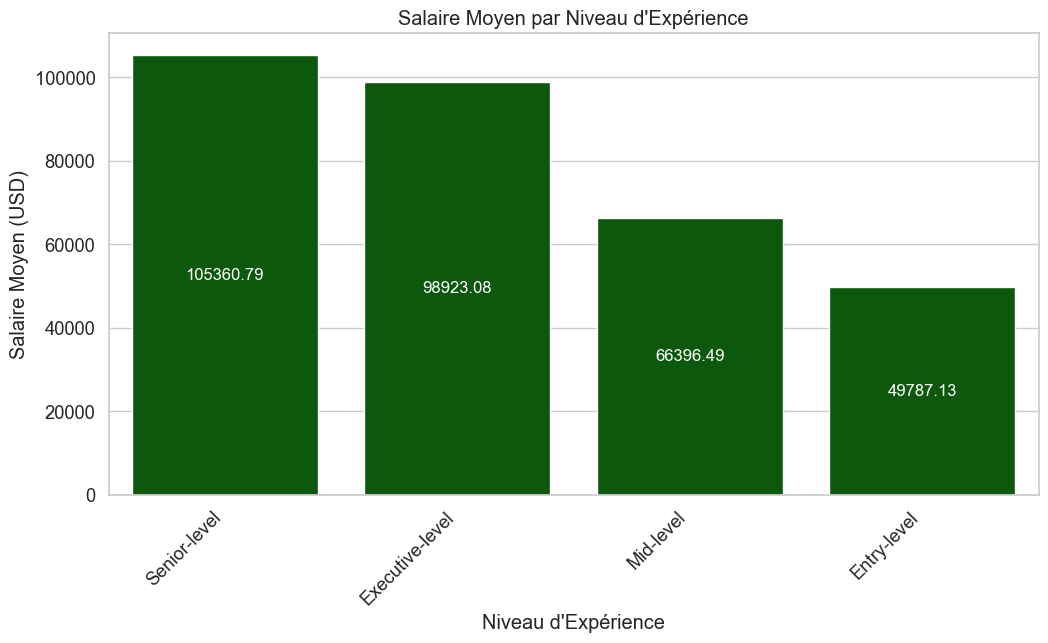

In [51]:

# Create a bar plot to visualize the mean salary for each experience level
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Experience level', y='Salary (USD)', data=mean_salary_by_level, color='darkgreen')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Niveau d\'Expérience')
plt.ylabel('Salaire Moyen (USD)')
plt.title('Salaire Moyen par Niveau d\'Expérience')

# Add enumerated values in the center of each bar
for index, value in enumerate(mean_salary_by_level['Salary (USD)']):
    ax.text(index, value / 2, f'{value:.2f}', ha='center', va='center', fontsize=12, color='white')

plt.show()
